# MC Focus Group - 19/10/17

We're currently studying MD integration algorithms, so that we can understand their application to HMC algorithms, and others...

In [5]:
import numpy
from matplotlib import pyplot

Consider the harmonic oscillator (2D phase space):

$U(x) = \frac{1}{2}kx^2$

$K(p) = \frac{p^2}{2m}$

$H(x, p) = U(x) + K(p)$


Implementation of verlocity Verlet for this example:
- Initialise system
- Calculate $F=-\frac{dU}{dx}$
- Update position & momentum
- Calculate total energy
- Plot point in phase space

We define the relevant function below...

In [17]:
def potential_energy(x, k):
    """
    Harmonic oscillator potential energy
    """
    return 0.5 * k * numpy.square(x)

def kinetic_energy(p, m):
    """
    Harmonic oscillator kinetic energy
    """
    return numpy.square(p) / (2 * m)

def total_energy(x, p, k, m):
    """
    Harmonic oscillator total energy
    """
    return potential_energy(x, k) + kinetic_energy(p, m)

def force(x, k):
    """
    Calculate force on harmonic oscillator with position x
    """
    return - k * x

def velocity_verlet(inital, k=1, m=1, nsteps=100, dt=0.01):
    """
    Propagate an initial point (x, p) through phase space for nsteps with timestep dt
    """
    xi, pi = initial
    total_energies = [total_energy(xi, pi, k, m)]
    potential_energies = [potential_energy(xi, k)]
    kinetic_energies = [kinetic_energy(pi, m)]
    xs = [xi]
    ps = [pi]
    for i in range(nsteps):
        x = xs[-1]
        p = ps[-1]
        v = p / m
        v_half = v + (dt / (2 * m)) * force(x, k)
        x_full = x + dt * v_half
        v_full = v_half + (dt / (2 * m)) * force(x_full, k)
        p_full = m * v_full
        total_energies.append(total_energy(x_full, p_full, k, m))
        potential_energies.append(potential_energy(x_full, k))
        kinetic_energies.append(kinetic_energy(p_full, m))
        xs.append(x_full)
        ps.append(p_full)
    return xs, ps, total_energies, potential_energies, kinetic_energies

With these functions defined, we can now run some short MD of the harmonic oscillator, for a given position and momentum:

In [94]:
initial = (1, 0)
xtraj, ptraj, h, u, k = velocity_verlet(initial, nsteps=62, dt=0.1)

We can then plot the phase space sampled during this trajectory:

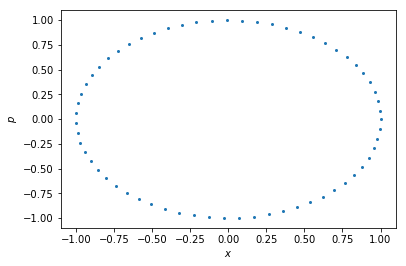

In [95]:
pyplot.plot(xtraj, ptraj, 'o', markersize=2, linewidth=0)
pyplot.xlabel("$x$")
pyplot.ylabel("$p$")
pyplot.show()

We can also check that the total energy is conserved:

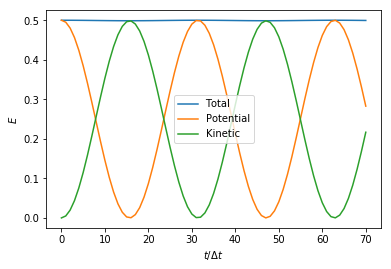

In [92]:
pyplot.plot(h, label="Total")
pyplot.plot(u, label="Potential")
pyplot.plot(k, label="Kinetic")
pyplot.xlabel("$t/\Delta t$")
pyplot.ylabel("$E$")
pyplot.legend()
pyplot.show()

These calculations all involve the NVE ensemble, as the energy is conserved. In future sessions, we could look at using different thermostats to sample the NVT ensemble and explore how they affect the phase space sampling of the harmonic oscillator...

We may also do some HMC of this system to sample NVT